In [1]:
import numpy as np
import pandas as pd

In [2]:
import csv

In [3]:
input_file = 'train_data.txt'
output_file = 'train_data.csv'
delimiter = '|'
column_names = ['id','title','genre','description']

In [4]:
with open(input_file, 'r', newline='', encoding='utf-8') as txt_file:
    reader = csv.reader(txt_file, delimiter=delimiter)
    
    with open(output_file, 'w', newline='', encoding='utf-8') as csv_file:
        writer = csv.writer(csv_file)
        
        # Write the column headers
        writer.writerow(column_names)
        
        # Write the data rows
        for row in reader:
            writer.writerow(row)

print(f'File converted successfully from {input_file} to {output_file}')

File converted successfully from train_data.txt to train_data.csv


In [5]:
df_train = pd.read_csv('train_data.csv')

In [6]:
df_train.head()

,id,title,genre,description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [7]:
df_train.dtypes

id              int64
title          object
genre          object
description    object
dtype: object

In [8]:
df_train.isnull().sum()

id             0
title          0
genre          0
description    0
dtype: int64

In [9]:
df_train['title']

0                       Oscar et la dame rose (2009) 
1                                       Cupid (1997) 
2                   Young, Wild and Wonderful (1980) 
3                              The Secret Sin (1915) 
4                             The Unrecovered (2007) 
                             ...                     
54209                                "Bonino" (1953) 
54210                    Dead Girls Don't Cry (????) 
54211      Ronald Goedemondt: Ze bestaan echt (2008) 
54212                       Make Your Own Bed (1944) 
54213     Nature's Fury: Storm of the Century (2006) 
Name: title, Length: 54214, dtype: object

In [10]:
df_train['genre']

0               drama 
1            thriller 
2               adult 
3               drama 
4               drama 
             ...      
54209          comedy 
54210          horror 
54211     documentary 
54212          comedy 
54213         history 
Name: genre, Length: 54214, dtype: object

In [11]:
df_train['genre'].value_counts()

genre
drama           13613
documentary     13096
comedy           7447
short            5073
horror           2204
thriller         1591
action           1315
western          1032
reality-tv        884
family            784
adventure         775
music             731
romance           672
sci-fi            647
adult             590
crime             505
animation         498
sport             432
talk-show         391
fantasy           323
mystery           319
musical           277
biography         265
history           243
game-show         194
news              181
war               132
Name: count, dtype: int64

In [12]:
df_train['genre'].unique()

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

In [13]:
encode_genre = { ' drama ':0, ' thriller ':1, ' adult ':2, ' documentary ':3, ' comedy ':4,
       ' crime ':5, ' reality-tv ':6, ' horror ':7, ' sport ':8, ' animation ':9,
       ' action ':10, ' fantasy ':11, ' short ':12, ' sci-fi ':13, ' music ':14,
       ' adventure ':15, ' talk-show ':16, ' western ':17, ' family ':18, ' mystery ':19,
       ' history ':20, ' news ':21, ' biography ':22, ' romance ':23, ' game-show ':24,
       ' musical ':25, ' war ':26 } 

In [14]:
dataset = df_train

In [15]:
dataset.head()

,id,title,genre,description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [16]:
dataset['genre'] = dataset['genre'].map(encode_genre)

In [17]:
dataset.head()

,id,title,genre,description
0,1,Oscar et la dame rose (2009),0,Listening in to a conversation between his do...
1,2,Cupid (1997),1,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",2,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),0,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),0,The film's title refers not only to the un-re...


In [18]:
import re
import nltk

In [19]:
!pip install rel
!pip install nltk

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gunta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [22]:
corpus = []

In [23]:
dataset['description'][0]

' Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.'

In [24]:
for i in range(min(10000, dataset.shape[0])):
    text = re.sub(pattern='[^a-zA-Z]',repl=' ',string = dataset['description'][i])
    text = text.lower()
    words = text.split()
    cleaned_words = [word for word in words if word not in set(stopwords.words('english'))]
    ps = PorterStemmer()
    words = [ps.stem(word) for word in cleaned_words]
    text = ' '.join(words)
    corpus.append(text)

In [25]:
corpus[0]

'listen convers doctor parent year old oscar learn nobodi courag tell week live furiou refus speak anyon except straight talk rose ladi pink meet hospit stair christma approach rose use fantast experi profession wrestler imagin wit charm allow oscar live life love full compani friend pop corn einstein bacon childhood sweetheart peggi blue'

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 10000 , ngram_range = (1,2))
x = cv.fit_transform(corpus[1:10000]).toarray()
y = dataset['genre'][1:10000].values

In [27]:
y.shape

(9999,)

In [28]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 2 )

In [29]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(x_train,y_train)

MultinomialNB(alpha=0.1)

In [30]:
y_pred = classifier.predict(x_test)
y_pred

array([ 3,  3, 13, ...,  0,  3,  4], dtype=int64)

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[304,  11,   0,  44,  56,   3,   2,   4,   1,   0,   7,   1,  22,
          0,   0,   2,   0,   2,   0,   0,   0,   0,   2,   7,   0,   1,
          1],
       [ 32,  19,   0,   2,   6,   1,   0,  12,   0,   0,   2,   0,   4,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  3,   0,   7,   1,   7,   0,   0,   1,   0,   0,   0,   0,   1,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [ 39,   1,   0, 396,  11,   1,   5,   5,   0,   0,   2,   1,  15,
          2,   9,   0,   3,   0,   1,   1,   0,   1,   1,   0,   0,   0,
          0],
       [ 77,   5,   1,  12, 136,   1,   4,   1,   0,   1,   7,   0,   9,
          0,   3,   0,   3,   1,   1,   0,   0,   0,   1,   6,   0,   2,
          0],
       [  6,   2,   0,   0,   3,   1,   0,   1,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  1,   0,   1,  11,   9,   0,  1

<Axes: >

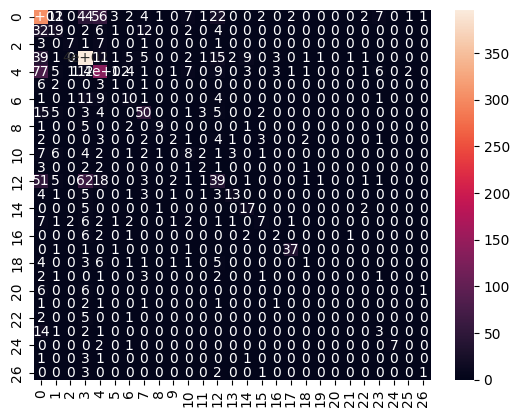

In [32]:
import seaborn as sns
sns.heatmap(cm,annot=True)

In [33]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test,y_pred)

0.5355

In [34]:
yp1 = classifier.predict(x_train)

In [35]:
accuracy_score(yp1,y_train)

0.8991123890486311

In [36]:
ywhole = classifier.predict(x)

In [37]:
accuracy_score(ywhole,y)

0.8263826382638264